![](https://www.hopkinsmedicine.org/-/media/images/health/1_-conditions/infectious-diseases/coronavirus-hero.ashx?h=500&la=en&mh=500&mw=1300&w=1297&hash=6464CC9E4F6364821A5973E670CFB3342C2D9AF4)
# Task 1: What is known about transmission, incubation, and environmental stability?

> We have power over the things we give a name.

The CORD-19 Challenge is a list of 10 tasks that need to performed upon a fairly large corpus of scientific literature relating to the discipline of Virology and other related fields. The tasks listed in this challenge can be classified into two primary categories:

1. What do we know about...
2. What has been published...

While the two are, a priori, different questions, for the purposes of this challenge, we believe that we can treat them as interchangeable. We make this assumption because the authors of this notebook are not placed well so as to be able to tell the difference between what has been published and what is 'known' in the fields which this corpus concerns itself. Further, it is true to a fairly large degree that one cannot answer the first question without answering the second. Hence, for the rest of this notebook, we concern ourselves with the second question.

Any answer to a question about what has been published does not serve its purpose unless it also describes the relationships between the several pieces of literature. This is because a survey is seldom about data, and often about relationships. Thus in this notebook, we have attempted to:

1. Identify articles of particular interest and merit about the various subtasks listed.
2. Make a map of the relationships between these articles.

The first task is achieved by stemming and tokenization, the second has been achieved by methods of agglomerative clustering and its [visualization](https://seaborn.pydata.org/generated/seaborn.clustermap.html).

## The Process

The following actions form the building blocks of this process:
1. Choosing a vocabulary------------------------------------>(User Input)
2. Generating Cluster Maps---------------------------------->(Using Lemmatization, Vectorization and Agglomerative Clustering)
3. Inspecting Cluster Maps to identify promising articles--->(User Discretion)
4. Inspecting Data Frames to read document contents--------->(User Discretion)

The flow of the process is described in this diagram:

![](https://github.com/sagarkolte/CORD-19/blob/master/KaggleSubmissionMaterial/Screenshot%202020-04-04%20at%209.04.56%20PM.png?raw=true)

In order to search for information about the topics listed in the subtask, we paid special attention to the set of words that best described the subtask. Thus every search began with the choice of a vocabulary. We then associated to each document a vector by listing out the number of times each word in the vocabulary appeared in the absrtact of the article. We then used cluster maps to visualize what the set of all abstracts looked like as a set of vectors. This served two purposes:

1. The cluster map gave us information about the availability of research on a certain topic.

2. How much of this research was in the context of the other words in the vocabulary.

For example, if we included the word 'virus' in the vocabulary, the clustermap showed that there was coupious amounts of research on the subject. However, very little of that was in the context of the Coronavirus, which is the focus of this challenge. Thus we have avoided including the word 'virus' in our vocabulary as it clouds the more subtle details in the clustermap.

Once we have a view of the cluster map produced by the whole vocabulary, we restrict the vocabulary to fewer words and generate the cluster maps again. In this iteration, we see that the cluster maps aid us greatly in identifying promising articles rapidly.

We illustrate this process with an example:


Task 1, Subtask 1: Range of incubation periods for the disease in humans (and how this varies across age and health status) and how long individuals are contagious, even after recovery.


Vocabulary:

1. incubation
2. age
3. convalescent
4. transmission
5. contagious
6. carrier
7. convalescence


From the Main Cluster map, we conclude that:

1. The relationship between age and transmission seems to be particularly well represented in the corpus.
2. Incubation and transmission seem to have been discussed in a reasonable number of articles, it is however not as many as the first category.
3. While 'convalescence' seems like a sparingly used word in the corpus, 'recovery' and 'transmission' appear together in a few documents, this gives us the hope that we might find information about convalescent transmitters in this overlap.
4. We also seem fairly well placed in terms of finding information about 'transmission' during 'incubation'.
5. The dependence of 'age' on 'incubation' periods also might be present here.

![MainClusterMap_1_1](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_1/MainClusterMap_1_1.png?raw=true)

We further restrict our vocabulary to the words: transmission, incubation, age.

And identify the article with SHA 091a8e9a61e19e88caeb039f0e3888d111b20439.

An actual investigation of the article will reveal that the content is very relevant to the subtask.

![age_incubation_1_1.png](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_1/age_incubation_1_1.png?raw=true)

We use this process repeatedly to arrive at articles relevant to the various subtasks.

## Summary of the search methodology

1. Define a vocabulary
2. Generate the main cluster diagram. (This .png file is saved in the output folder)
3. Informed by the inspection of the main cluster diagram define a sub-vocabulary.
4. Generate a cluster diagram using the sub-vocabulary. (This .png file is saved in the output folder)
5. Generate an html file that contains the Title, Abstract and Author information of the most relevant papers. 
6. To parse the full text of a particular SHA, we use the function *get_sentences('sha','word_to_search')*

## Notes about the algorithms used

The principal philosophy at work here is that:

1. Given a set of words, we can associate to every document a vector of the count of words. **([Lemmatization](https://en.wikipedia.org/wiki/Lemmatisation), [tokenization](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html))
2. We then treat all documents as vectors and perform agglomerative clustering the set of vectors. **([Agglomerative Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering#Agglomerative_clustering_example))
3. We represent the results of our clustering using cluster maps. **([Seaborn Cluster Maps](https://seaborn.pydata.org/generated/seaborn.clustermap.html))
4. We use sentence tokenization to search for sentences that contain the words of our interest. **([sent_tokenize](https://www.nltk.org/api/nltk.tokenize.html))



## Drawbacks of the proposed approach

1. The algorigithm currently is only vectorizing article abstracts. While getting it to parse the whole text is not a difficult code change, it consumes a significant amount of comuting power and time. We did not have this luxury given the deadlines. 

    Possible Resolution: We call upon the experts in parallel processing and threading to help us out with this issue.
    
2. We have not managed to make our cluster maps interactive, for instance, if we find a particular row of the map interesting, we should be able to hover over the row to be able to see the abstract and title of the associated article.

    Possible Resolution: We call upon the members well versed with interactive visualization libraries in Python to collaborate with us on this topic.






In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import json
import re
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = set(stopwords.words('english'))
from nltk.tokenize import RegexpTokenizer
import spacy
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
nlp.max_length = 1500000
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations 
import functools
import operator
stop_words = set(stopwords.words('english'))
import os
import pathlib
from shutil import copyfile
from shutil import copy
from nltk import sent_tokenize, word_tokenize
pd.options.display.max_colwidth = 2000

In [2]:
#All the file path information
mypath = '../input/CORD-19-research-challenge/'
docdir1= 'biorxiv_medrxiv/biorxiv_medrxiv/pdf_json/'
docdir2 = 'comm_use_subset/comm_use_subset/pdf_json/'
docdir3 = 'custom_license/custom_license/pdf_json/'
docdir4 = 'noncomm_use_subset/noncomm_use_subset/pdf_json/'
root = './'
dir_list = [docdir1,docdir2,docdir3,docdir4]

#####################################################-------------------------------->Extracting Relevant Metadata from a given json

def create_refkeys(n):#-------------------------------->Used to extract references
    key_list = ['BIBREF'+str(i) for i in range(n) ]
    return key_list

def journals_reffered(p_dict):#------------------------->Gets all the journal names in the bibliography
    try:
        n = len(p_dict['bib_entries'])
        ref_list = create_refkeys(n)
        j_ref = [p_dict['bib_entries'][ref]['venue'] for ref in ref_list]
    except:
        j_ref = 'NA'
    return j_ref

def get_sha(p_dict):#------------------------------------>Gets the SHA of the article
    try:
        sha = p_dict['paper_id']
    except:
        sha = 'NA'
    return sha

def get_title(p_dict):#---------------------------------->Gets the title
    try:
        title = p_dict['metadata']['title']
    except:
        title = 'NA'
    return title

def get_doi_meta(text):#---------------------------------->Guesses the doi of the article from the text
    try:
        #file_str = str(json_to_dict(sub_dir,file_name)).replace('\'','')
        doi = re.findall('doi.org/(.*?)[\s]',text)[0]
    except:
        doi = 'NA'
    return doi

def get_first_author(p_dict):#------------------------------>Gets the first author
    try:
        first = p_dict['metadata']['authors'][0]['first']
        last =  p_dict['metadata']['authors'][0]['last']
        name = first+' '+last
    except:
        name = 'NA'
    return name

def get_institution(p_dict):#-------------------------------->Gets the institution to which the first author is affiliated
    try:
        inst = p_dict['metadata']['authors'][0]['affiliation']['institution']
    except:
        inst = 'NA'
    return inst

def text_to_vec_meta(text,task):#----------------------------->Creates a vector given an abstract and a vocabulary(task)
    l = tok_pun_lem(text)
    c_dict = Counter(l)
    c_dict = {k:[c_dict[k]] for k in task }
    df = pd.DataFrame(c_dict)
    return df

def get_abstract(p_dict):#------------------------------------>Gets the abstract of the article
    try:
        abstract = p_dict['abstract'][0]['text']
    except:
        abstract = 'NA'
    return abstract

def create_row_meta(subdir,file_name,task):#------------------->Puts all the metadata into a single row with the word counts
    #print('running create_row_meta...')
    p_dict = json_to_dict(subdir,file_name)
    text =  str(p_dict).replace('\'','')
    sha = get_sha(p_dict)
    title = get_title(p_dict)
    author = get_first_author(p_dict)
    institution = get_institution(p_dict)
    doi = get_doi_meta(text)
    abstract = get_abstract(p_dict)
    p_dict = get_abstract(p_dict)
    text =  str(p_dict).replace('\'','')
    df1 = text_to_vec_meta(text,task)
    df2 = pd.DataFrame({'SHA':[sha], 
                        'Title':[title], 
                        'First Author':[author], 
                        'Institution':[institution], 
                        'DOI':[doi], 
                        'Abstract':[abstract]})
    df = pd.concat([df2,df1],axis = 1)
    return df

def sha_to_meta(sha):#------------------->Puts all the metadata into a single row with the word counts
    file_path = sha_to_file_path(sha)
    p_dict = json_to_dict_1(file_path)
    text =  str(p_dict).replace('\'','')
    sha = get_sha(p_dict)
    title = get_title(p_dict)
    author = get_first_author(p_dict)
    institution = get_institution(p_dict)
    doi = get_doi_meta(text)
    abstract = get_abstract(p_dict)
    p_dict = get_abstract(p_dict)
    #text =  str(p_dict).replace('\'','')
    #df1 = text_to_vec_meta(text,task)
    df2 = pd.DataFrame({'SHA':[sha], 
                        'Title':[title], 
                        'First Author':[author], 
                        'Institution':[institution], 
                        'DOI':[doi], 
                        'Abstract':[abstract]})
    #df = pd.concat([df2,df1],axis = 1)
    return df2.T



def meta_pipeline(task):#--------------------------------------------------------------->Gives the final dataframe for all articles which have an abstract
    task_number = task[0]
    subtask_number = task[1]
    task = task[2]
    g = lambda subdir,task:pd.concat([create_row_meta(subdir,file_name,task) for file_name in get_file_list(subdir,mypath)])
    df_list = list(map(g,dir_list,[task]*len(dir_list)))
    df_final = pd.concat(df_list)
    o = create_task_dir(task_number,subtask_number)
    dest_file = root+o+'/'+'MetaTable_'+str(task_number)+'_'+str(subtask_number)+'.csv'
    try:
        os.makedirs(root+o)
    except:
        df_final.to_csv(dest_file)    
    df_final.to_csv(dest_file)
    return df_final


def word_selector(df,word_list):#------------------------------------------------------->Returns a data frame containing articles with words specified in the list
    df['flag'] = df.apply(lambda row:np.prod(row[word_list]), axis=1)
    df = df[df['flag']!=0]
    df = df.drop('flag',axis = 1)
    df = df.loc[:, (df != 0).any(axis=0)]
    df = df.sort_values(word_list,ascending = False)
    df = df[0:15]
    df = df.loc[:, (df != 0).any(axis=0)]
    return df

def get_top_matches(df,word_list,task):
    task_number = task[0]
    subtask_number = task[1]
    #df['sum'] = df.apply(lambda row:np.sum(row[word_list]),axis=1)
    #df = df.sort_values('sum', ascending=False)
    #df = df.head(5)
    o = create_task_dir(task_number,subtask_number)
    dest_file = root+o+'/'+'TopMatches_'+str(task_number)+'_'+str(subtask_number)+'.csv'
    df.to_csv(dest_file)
    return df
    

########################################################-------------------------------->Extracting Relevant Metadata from a given json

In [3]:
#######################################################--------------------------------->Natural Language Processing module
def get_file_list(sub_dir,mypath=mypath):#---------------------------------------------->fetches the list of files from a subdirectory.
    #print('running get_file_list...')
    #print(mypath+sub_dir)
    #print(listdir(mypath+sub_dir))
    onlyfiles = [f for f in listdir(mypath+sub_dir) if isfile(join(mypath+sub_dir, f))]
    #print(len(onlyfiles))
    return onlyfiles

def get_file_list_1(sub_dir,mypath):#---------------------------------------------->fetches the list of files from a subdirectory.
    (curdir,dir_names, onlyfiles) = next(os.walk(mypath+sub_dir+'/pdf_json'))
    print('running get_file_list...')
    print(mypath+sub_dir)
    print(listdir(mypath+sub_dir))
    #onlyfiles = [f for f in listdir(mypath+sub_dir) if isfile(join(mypath+sub_dir, f))]
    #print(len(onlyfiles))
    return onlyfiles



def json_to_dict(sub_dir,filename,mypath=mypath):#--------------------------------------->Converts json flies to dict.
    full_path = mypath+sub_dir+filename
    with open(mypath+sub_dir+filename, "r") as read_file:
        data = json.load(read_file)
    return data

def json_to_dict_1(full_path):#---------------------------------------------------------->Converts json flies to dict.
    with open(full_path, "r") as read_file:
        data = json.load(read_file)
    return data


def get_doi(sub_dir,file_name):#---------------------------------------------------------->Guesses the doi of the article from the text
    try:
        file_str = str(json_to_dict(sub_dir,file_name)).replace('\'','')
        doi = re.findall('doi.org/(.*?)[\s]',file_str)[0]
    except:
        doi = 'NA'
    return doi

def tok_pun_lem(text):#------------------------------------------------------------------->Tokenizes, Removes Punctuation and Lemmatizes
    tokenizer = RegexpTokenizer(r'\w+')
    result = tokenizer.tokenize(text.lower())
    new_sentence = list(filter(lambda x:False if x in stop_words else True,result))
    new_sentence_s = " ".join(new_sentence)
    doc = nlp(new_sentence_s)
    new_sentence_l = [token.lemma_ for token in doc]
    return new_sentence_l

def abst_to_vec(sub_dir,task):#----------------------------------------------------------->Creates a vector given an abstract and a vocabulary(task)
    
    file_list = get_file_list(sub_dir)
    print('old len',len(file_list))
    file_list = filter(lambda file_name: True if len(json_to_dict(sub_dir,file_name)['abstract'])>0 else False, file_list) 
    text_list = [json_to_dict(sub_dir,file_name)['abstract'][0]['text'].lower() for file_name in file_list]
    print('new len',len(text_list))
    l_list = [tok_pun_lem(text) for text in text_list]
    c_dict_list = [Counter(l) for l in l_list]
    c_dict_list = [{k:[c_dict[k]] for k in task } for c_dict in c_dict_list]
    df_list = [pd.DataFrame(c_dict) for c_dict in c_dict_list]
    final_df = pd.concat(df_list)
    print('final len',len(final_df))
    return final_df

def text_to_vec(sub_dir,task):#----------------------------------------------------------->Creates a vector given an abstract and a vocabulary(task)
    file_list = get_file_list(sub_dir)
    print('old len',len(file_list))
    text_list = [str(json_to_dict(sub_dir,file_name)).lower().replace('\'','') for file_name in file_list]
    print('new len',len(text_list))
    l_list = [tok_pun_lem(text) for text in text_list]
    c_dict_list = [Counter(l) for l in l_list]
    c_dict_list = [{k:[c_dict[k]] for k in task } for c_dict in c_dict_list]
    df_list = [pd.DataFrame(c_dict) for c_dict in c_dict_list]
    final_df = pd.concat(df_list)
    print('final len',len(final_df))
    return final_df
####################################################--------------------------------------->Natural language processing module
def abst_pipeline(task):
    df_list = [abst_to_vec(subdir,task) for subdir in dir_list]
    df = pd.concat(df_list)
    return df

def text_pipeline(task):
    df_list = [abst_to_vec(subdir,task) for subdir in dir_list]
    len_list = [len(x) for x in df_list]
    print(len_list)
    df = pd.concat(df_list)
    print(len(df))
    return df
###############################################--------------------------------------------->Data Extraction Pipeline
def get_full_paths(root):
    path_list = [str(i) for i in list(pathlib.Path('../').glob('**/*'))]    
    return path_list

def sha_to_file_path(sha):
    path_list = get_full_paths(root)
    g = lambda x: sha in x 
    file_path = list(filter(g,path_list))
    return file_path[0]

def get_sentences(sha,word):
    text = sha_to_text(sha)
    text = re.sub('[{:\}]', '', text) 
    sentences = sent_tokenize(text) 
    g = lambda x : True if word in word_tokenize(x) else False
    sentences = list(filter(g,sentences))
    #sentences = [i for i in sent_tokenize(text) if "word" in word_tokenize(i)]
    
    return sentences

def sha_to_text(sha):#---------------------------------------------------------------------->Gets the full text of the article given the SHA.
    full_path = sha_to_file_path(sha)
    with open(full_path, "r") as read_file:
        data = json.load(read_file)
    text = str(data).lower().replace('\'','')
    return text



def save_sha(sha,task_number,subtask_number):
    o = create_task_dir(task_number,subtask_number)
    file_name = sha_to_file_path(sha)
    dest_file = root+o+'/'+sha+'.json'
    os.makedirs(os.path.dirname(dest_file), exist_ok=True)
    try:
        copy(file_name,dest_file)#----copyfile
    except:
        return None
    return None

def create_task_dir(task_number,subtask_number):
    o = 'Task_'+str(task_number)+'/'+'Sub_Task_'+str(subtask_number)
    return o

def sha_pipeline(df,task_number,subtask_number):
    #sha_list = list(df['SHA'])
    sha_list = df.index.values.tolist()
    l = list(map(save_sha,sha_list,[task_number]*len(sha_list),[subtask_number]*len(sha_list)))
    return None
##################################################------------------------------------------>Data Extraction Pipeline

## Vocabularies for the subtasks in Task 1

In [4]:
task11 = [1,1,['incubation','age','convalescent','transmission','contagious','carrier','convalescence']]
task12 = [1,2,['transmission','asymptomatic','shedding','shed']]
task13 = [1,3,['transmission','seasonality','seasonal']]
task14 = [1,4,['charge','distribution','coronavirus','persistence','protein','surface','adhesion']]
task15 = [1,5,['persistence','stability','sputum','urine','feces','fecal','blood','nasal','discharge','coronavirus']]
task16 = [1,6,['persistence','surface','virus']]
task17 = [1,7,['history','virus','shed','shedding','natural']]
task18 = [1,8,['diagnosis','diagnostic','clinical','products','process']]
task19 = [1,9,['disease','model','infection','transmission']]
task110 = [1,10,['phenotypic','change','adapt','adaptation','virus','morphology','gene','genetic']]
task111 = [1,11,['immune','immunity','response','virus','cronavirus']]
task112 = [1,12,['protective','protect','equipment','risk','transmission','health','care','community']]
task113 = [1,13,['environment','transmission','virus']]

In [5]:
task = task15#---------------------->Change the task here

In [6]:
task_number = task[0]
subtask_number = task[1]
df = meta_pipeline(task)#----------->Create the main dataframe for the subtask

In [7]:
cluster_df = df[task[2]]
cluster_df['sum'] = cluster_df.apply(lambda row:sum(np.array(row)),axis = 1)
cluster_df = cluster_df[cluster_df['sum']>=2]
cluster_df = cluster_df.drop('sum',axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Create the Main Cluster Map of the relevant literature

/opt/conda/lib/python3.6/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


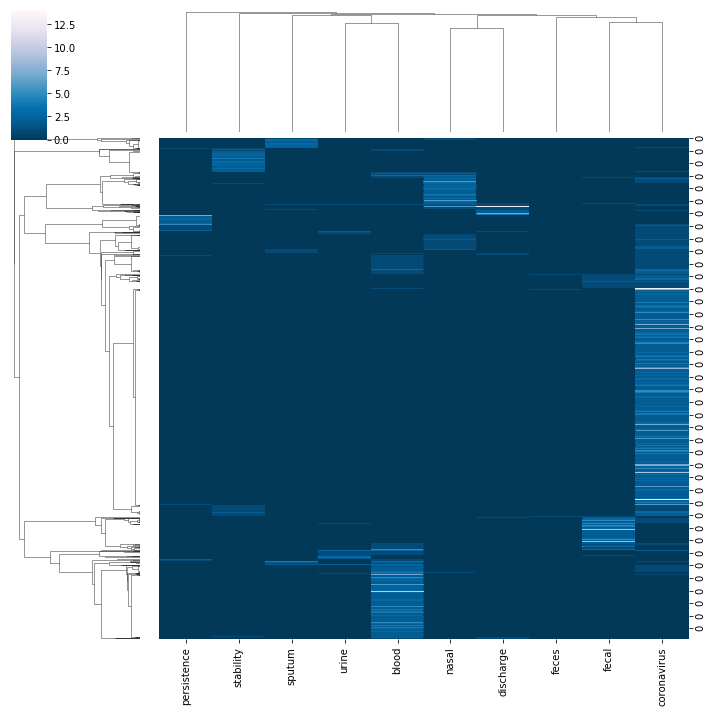

In [8]:
g = sns.clustermap(cluster_df,cmap='PuBu_r',metric = 'cosine')
o = create_task_dir(task_number,subtask_number)
dest_file = root+o+'/'+'MainClusterMap_'+str(task_number)+'_'+str(subtask_number)+'.png'
g.savefig(dest_file, dpi=400,bbox_inches='tight')

## Select words from the subtask vocabulary to uncover relevant articles

In [9]:
word_list = ['persistence','coronavirus']#------------->study map above and select words here
df1 = word_selector(df,word_list)

## Create a cluster map for the smaller vocabulary

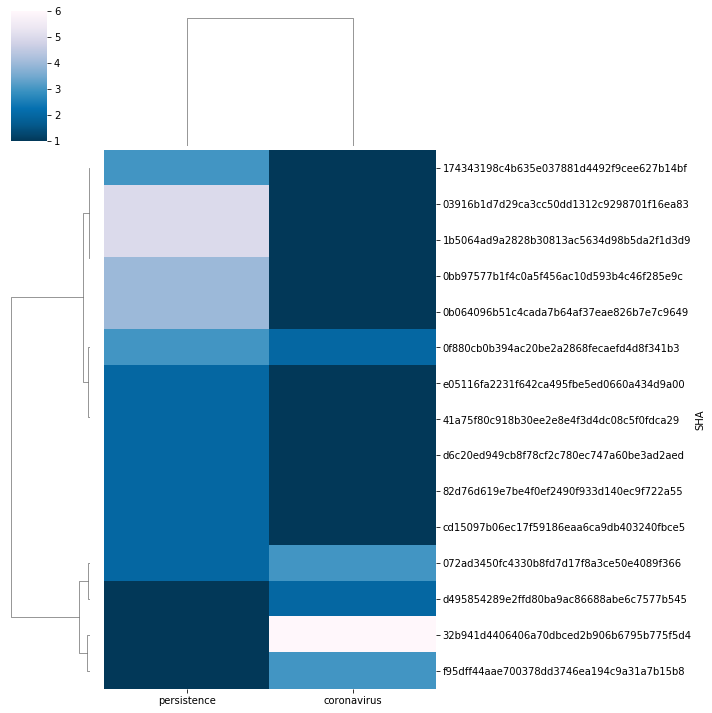

In [10]:
df1_cluster = df1.set_index("SHA", inplace = False) 
df1_cluster = df1_cluster.drop(['Title','First Author','Institution','DOI','Abstract'],axis=1)
g = sns.clustermap(df1_cluster,cmap='PuBu_r',metric = 'cosine',yticklabels=True)
o = create_task_dir(task_number,subtask_number)
dest_file = root+o+'/'+word_list[0]+'_'+word_list[-1]+'_'+str(task_number)+'_'+str(subtask_number)+'.png'
g.savefig(dest_file, dpi=400,bbox_inches='tight')

## Create a html document of the most relevant papers

In [11]:
df_save = get_top_matches(df1_cluster,word_list,task)
sorted_sha_list = list(df_save.sort_index().index.values)
meta_df_list = list(map(sha_to_meta,sorted_sha_list))
meta_df_final = pd.concat(meta_df_list)
task_number = task[0]
subtask_number = task[1]
o = create_task_dir(task_number,subtask_number)
dest_file_html = root+o+'/'+'sha_df'+str(task_number)+'_'+str(subtask_number)+'.html'
meta_df_final.to_html(dest_file)
print ("please find the list of relevant papers saved as:"+dest_file_html)

please find the list of relevant papers saved as:./Task_1/Sub_Task_5/sha_df1_5.html


## Search for excerpts within the article text using the SHA

In [12]:
print('\n\n'.join(get_sentences('4bc6d312effedb4dafb7bca22236c006ad1f7136','children')))

an outbreak from march to june 2011 was reported to have occurred at an elementary school of 698 pupils in china and it was found that the outbreak was due to direct transmission between school children.

based on the symptom onset date and the social contact network of the children, in this study we estimate the serial interval (i.e.

the investigations provided evidence that this outbreak was due to human-to-human transmission., cite_spans [start 271, end 274, text [1,, ref_id bibref0, start 275, end 277, text 2], ref_id bibref1, start 290, end 293, text [3], ref_id bibref2], ref_spans [], section introduction, text vaccination is the best way to prevent hepatitis a. all of the cases in this outbreak (except boy a) were children born before 2006 and had not received free vaccination which was introduced in 2006 in anhui province, china [3] .

to effectively control the spread and outbreak of hepatitis a, it is important to know its transmissibility which will help estimate the propor

# Findings for all the Sub Tasks within Task 1
**Please note that we have refrained mentioning the Meta Data about the articles we found noteworthy, Instead we have mentioned the SHAs of the articles. To retrieve the details of the article such as the Title, Author, doi, the function 
*sha_to_meta()* can be used, this function takes in the SHA as a string and returns the details of the article.
**

# Task 1, Subtask 1
**Range of incubation periods for the disease in humans (and how this varies across age and health status) and how long individuals are contagious, even after recovery.

## Vocabulary Used:
1. incubation
2. age
3. convalescent
4. transmission
5. contagious
6. carrier
7. convalescence

# Note on the vocabulary
The carriers that transmit the disease after recovery are called convalescent transmitters/carriers.
The carriers that transmit the disease during incubation are called incubation carriers/trnasmitters.
Hence we found it necessary to include these words in our vocabulary. We have excluded the word 'health' because we notice that it tends to be used more frequently in the context of health care which is not the subject of this subtask.

## Notes on the Main Cluster Diagram

![MainClusterMap_1_1](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_1/MainClusterMap_1_1.png?raw=true)

1. The relationship between age and transmission seems to be particularly well represented in the corpus.
2. Incubation and transmission seem to have been discussed in a reasonable number of articles, it is however not as many as the first category.
3. While 'convalescence' seems like a sparingly used word in the corpus, 'recovery' and 'transmission' appear together in a few documents, this gives us the hope that we might find information about convalescent transmitters in this overlap.
4. We also seem fairly well placed in terms of finding information about 'transmission' during 'incubation'.
5. The dependence of 'age' on 'incubation' periods also might be present here.

## Choice of pairs of words to uncover the subtopics

![age_incubation_1_1.png](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_1/age_incubation_1_1.png?raw=true)
1. age, transmission : This is to understand the relationship between age and transmissibility.
2. age, incubation: This is to understand the relationship between age and the incubation period.*
3. recovery, transmission: This is to understand the phenomenon of convalescent transmitters.*
4. convalescent, transmission: This is for the same reason as above.*

*these tasks were explicitly mentioned in the formal challenge.

# List of top 5 documents ranked by the 'sum score' for each pair of words.

We would like to note here that resders need not restrict themselves to the five documents mentioned here and are encouraged to look at the cluster diagrams of the type age_incubatio.png for more results on the same topic. The details of the documents that do not appear in the top five below can be found in the file MetaTable_1_1.csv


## Top 5 article SHAs
### age, incubation
                                
* 091a8e9a61e19e88caeb039f0e3888d111b20439
* c1ae608c7ffb926a0f50a6a34c0780983274ea74
* fd318109132dde6e918142f008b163e301db7f69
* a58220fe30325ce4b67376b18556722c2192c990
* bd6a6cd1c453c47af156f6e42ba837207ab45c63

### recovery, transmission
* 709e51c08788944db48106970f38cebe2b5bd596
* 4d1090e239baa1ea54af521f4b8bd8b5ab51fd35
* 6fad80bbb0ee407dd16686c33a54f1b2a1b149c8---->Article should be part of the topic 'Disease Models'(subtask 9)
* 8633e427b6d705db65d4b73fc201a87e03f4e253---->Article should be part of the topic 'Disease Models'(subtask 9)
* b1d5a591bff2740b3b81dce8659fec2470ac9dfb---->Article should be part of the topic 'Persistence on Surfaces'(subtask 6)
--recovery does not seem like an appropriate word to search for convalescent transmission.

### Convalescent, transmission
* ee0d298d09635c5ae72d4584fba105a705d25afb----->This article is about the presence of neutralizing antibodies in convalescent serum
* 46411996e57929617bbb462c3cbc429d3e70619d----->This articles is also about the role of convalescent sera in treatment.
* f81a3ef89c4144309cf86374440e2a3a8a0e095c
* d1312034ff2df8c47731d9519e2a4330e5cbc535
* d2bf31d4a63b71e7b5bb16f4375134d4ef881d25----->This articles is also about the role of convalescent sera in treatment.
* Contrary to our expectations about finding transmissibility during convalescence, we found possible ways to treat patients using the blood of convalescent patients.

4. Convalescent, carrier
We found no documents with both these words together, perhaps this is an invitation for the community to dig deeper into the corpus.



## Articles of Note

    c1ae608c7ffb926a0f50a6a34c0780983274ea74
    This article has an interesting analysis of the incubation period as a random variable and its parameters as a function of age.
    An excerpt:
text: "The incubation period of COVID-19 did not follow general incubation distributions such as lognormal, Weibull, and Gamma distributions. We estimated that the mean and median of its incubation were 5.84 and 5.0 days via bootstrap and proposed Monte Carlo simulations. We found that the incubation periods of the groups with age>=40 years and age<40 years demonstrated a statistically significant difference. The former group had a longer incubation period and a larger variance than the latter. It further suggested that different quarantine time should be applied to the groups for their different incubation periods. Our machine learning analysis also showed that the two groups were linearly separable."

    6fad80bbb0ee407dd16686c33a54f1b2a1b149c8
    While we hoped that this article will shed light on convalescent transmission, it actually does not. However it has some interesting statements to make about delayed recovery and non-uniform transmission on the spread of diseases. 
    An Excerpt:
text: "We investigate the effects of delaying the time to recovery (delayed recovery) and of nonuniform transmission on the propagation of diseases on structured populations. Through a mean-field approximation and large-scale numerical simulations, we find that postponing the transition from the infectious to the recovered states can largely reduce the epidemic threshold, therefore promoting the outbreak of epidemics. On the other hand, if we consider nonuniform transmission among individuals, the epidemic threshold increases, thus inhibiting the spreading process. When both mechanisms are at work, the latter might prevail, hence resulting in an increase of the epidemic threshold with respect to the standard case, in which both ingredients are absent. Our findings are of interest for a better understanding of how diseases propagate on structured populations and to a further design of efficient immunization strategies."

    d2bf31d4a63b71e7b5bb16f4375134d4ef881d25
This article speaks of the infection neutralizing properties of convalescent sera from SARS patients.







# Task 1, Subtask 2
**Prevalence of asymptomatic shedding and transmission (e.g., particularly children).


## Vocabulary Used
1. asymptomatic
2. shedding
3. shed
4. transmission
5. child
6. infant

# Notes on the vocabulary
Choosing a vocabulary fot this task is particularly simple, we only have to be careful in using the correct stems of the words we are looking to capture.

## Notes on the main cluster diagram
![MainClusterMap_1_2](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_2/MainClusterMap_1_2.png?raw=true)

The main cluster diagram is rather reassuring. We seem to have documents on asymptomatic transmission and asymptomatic shedding among infants and chidren.


## Choice of pairs of words to uncover the subtopics

![as_shedding](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_2/asymptomatic_transmission_1_2.png?raw=true)

1. asymptomatic, transmission
2. child, shed, shedding
3. asymptomatic, child, infant

# Top 5 article SHAs 
1. asymptomatic, transmission
* f628a6163a739a85fd972c00b7d274823c41bb66
* 7ffbca7e7e60e13461801769ad70f770879d0f81
* 4bc6d312effedb4dafb7bca22236c006ad1f7136
* 691856452de91727b7b9b7644f82b4bc5876f32f
* b29af8a410b032d1159bf9cefe0654c43f3503d9

2. child, shed, shedding
* 03be1b13bb27c345596bc823c25963ebeb990640
* 820f3633db1b3b98889e6a0d257d10d385be85c8

3. asymptomatic, child, infant
* e44632c9b598cac15ccda521e13c65ca9fcf7426
* 1e9929bbb08fb46de40a699d0c2d2aa7c287e5b4
* ea6327597215470d7c489d8bbc7da34fb8f49d1a








# Articles of Note:

    f628a6163a739a85fd972c00b7d274823c41bb66
    
    This appears to be a very relevant and comprehensive study of asymptomatic transmission.

    Excerpt:
"text": "Here, we focus on a third effect. If asymptomatic cases are important for transmission, they also have the potential to affect estimates of key parameters of disease spread such as the basic reproduction number R 0 (i.e., the expected number of secondary cases generated by an average primary case in a fully susceptible population [5] ). Thus, we investigate the relationship between individual-level features of asymptomatic cases (e.g., the probability that an infection is asymptomatic, asymptomatic case duration, transmission by asymptomatic individuals) to dynamics at the population scale.",



    7ffbca7e7e60e13461801769ad70f770879d0f81
    
    This article makes observations about the prevalence of asymptomatic transmission among ambulatory populations such as tourists. It also has important references to literature about shedding and asymptomatic transmission among children.

    Excerpts:

Analysis of these data indicated that over 6% of participants tested positive for shedding of respiratory virus. While participants who tested positive were more likely to report symptoms than those who did not, over half of participants who tested positive were asymptomatic."

 In general, among children, studies have found that 24.6% to 64% of human rhinovirus (HRV) infections are asymptomatic (7) (8) (9) (10) . A number of studies have also documented the fraction of asymptomatic children who are shedding virus rather than the fraction of infected children who are asymptomatic. Calvo et al. documented an HRV shedding rate of 12.3% among healthy children (9) . Van Benten et al. found that 20% of asymptomatic infants \u05452 years old tested positive for HRV (11) . Similarly, Nokso-Koivisto et al. found that 20% of children without any past or recent respiratory infection symptoms tested positive for HRV or coronavirus (CoV) (12) . Other studies examining multiple respiratory agents documented respiratory virus infection in 40% and 42% of children without symptoms (13, 14) .
 
    4bc6d312effedb4dafb7bca22236c006ad1f7136
    
    This article studies the transmission of the Hepatitis A virus among children, both symptomatic and asymptomatic. The use of disease models and statistical methods is prevalent in this article.

    Excerpt:

Our transmission dynamics model suggests that the proportion of symptomatic infections is about 9%, implying that there were about 344 asymptomatic infections along with the 32 observed symptomatic cases. Furthermore, it is shown that the inclusion of asymptomatic infection in the epidemic process increases the estimate of R 0 but does not do so greatly provided that the proportion of symptomatic infections is constant over the outbreak and there is no difference in transmissibility between symptomatic and asymptomatic infections."

These two facts suggest that transmission occurs from asymptomatic cases as well as from symptomatic cases. This study [3] for the outbreak provides a good dataset to estimate the transmissibility of hepatitis A virus among na\u00efve young children, which is the objective of this study."


    691856452de91727b7b9b7644f82b4bc5876f32f

    Excerpt:

"text": "The role of and the extent to which infected asymptomatic human cases play a role in transmission is unknown. WHO estimates that ~20% of reported MERS cases are asymptomatic (54), but this estimate is likely underestimated given surveillance focuses on severe cases requiring hospitalization (55) and evidence from serologic studies (32) . One study documented prolonged shedding of MERS-CoV in an asymptomatic health care worker (56) , which provides evidence that, if not properly isolated, asymptomatic cases in health care settings and in the community could lead to onward transmission. The experts included in this study believe that contact with asymptomatic cases is as important as that with infected dromedaries. Comprehensive testing of contacts of MERS-CoV patients, regardless of the presence of symptoms, is required to evaluate infection between known cases. The role of asymptomatic cases or carriers, if they are indeed infected, also needs careful consideration in the community setting. Not all reported primary cases can be traced back to contact with dromedaries, and it is likely, at least in some cases, that an asymptomatic or mildly symptomatic case may be an intermediary between dromedary contact and a symptomatic human case.",




# Task 1, Subtask 3
**Seasonality of transmission.


## Vocabulary Used
1. transmission
2. seasonality
3. seasonal

## Notes on the vocabulary
Here we simply make sure that we do not miss out on the seasonality due to bad stemming.

## Notes on the main cluster diagram
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_3/MainClusterMap_1_3.png?raw=true)

The main cluster diagram shows a significant amount of literature on seasonality of transmission.

## Choice of pairs of words to uncover the subtopics

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_3/transmission_seasonal_1_3.png?raw=true)
1. transmission, seasonal

## Top 5 article SHAs
### transmission, seasonal
* 1218f278a4f8d83dac14b23c8f698062812ef9d5
* 60f1a9fff7e34e6a528a2a06dedb23700c87e114
* 4be572af41fbf94759bf8872ff257fa0f632dca0
* 1dc4f757f425b080168840089f1f4d29bac75f51
* c8ca3a5306db10a7842b853031404ecbc0a363ed

## Articles of Note:

    1218f278a4f8d83dac14b23c8f698062812ef9d5
    This article explores the effect of seasonal changes in the transmissibility of the corona virus
    
    Excerpt:
"text": "A novel coronavirus (SARS-CoV-2) first detected in Wuhan, China, has spread rapidly since December 2019, causing more than 80,000 confirmed infections and 2,700 fatalities (as of Feb 27, 2020). Imported cases and transmission clusters of various sizes have been reported globally suggesting a pandemic is likely. Here, we explore how seasonal variation in transmissibility could modulate a SARS-CoV-2 pandemic. Data from routine diagnostics show a strong and consistent seasonal variation of the four endemic coronaviruses (229E, HKU1, NL63, OC43) and we parameterize our model for SARS-CoV-2 using these data. The model allows for many subpopulations of different size with variable parameters. Simulations of different scenarios show that plausible parameters result in a small peak in early 2020 in temperate regions of the Northern Hemisphere and a larger peak in winter 2020/2021. Variation in transmission and migration rates can result in substantial variation in prevalence between regions. While the uncertainty in parameters is large, the scenarios we explore show that transient reductions in the incidence rate might be due to a combination of seasonal variation and infection control efforts but do not necessarily mean the epidemic is contained. Seasonal forcing on SARS-CoV-2 should thus be taken into account in the further monitoring of the global transmission. The likely aggregated effect of seasonal variation, infection control measures, and transmission rate variation is a prolonged pandemic wave with lower prevalence at any given time, thereby providing a window of opportunity for better preparation of health care systems.",

    60f1a9fff7e34e6a528a2a06dedb23700c87e114
    This articles explores the relationship between transmissibility of the infulenza virus and seasonal conditions.

    Excerpt:
"text": "Influenza viruses display distinct seasonal patterns in temperate climates with peak infection rates occurring in the winter months and little to no influenza virus activity detected at other times of the year [1] . However, it is not completely understood why we have \"flu seasons\". The same seasonal trends do not necessarily apply to regions in tropic and subtropic climates where influenza virus activity can be detected year round. Social and health factors such as indoor crowding and seasonal fluctuations in host immunity have been offered as explanations for influenza seasonality, but the lack of direct evidence supporting these theories suggests that the environment may be the most relevant contributor and potential driving force of seasonality [1, 2] . Although seasonal influenza viruses display predictable infection patterns, the four most recent influenza virus pandemics began with newly emerged viruses appearing outside the usual influenza season (1918 Spanish Influenza A H1N1, 1957 -1958 Asian Influenza A H2N2, 1968 Hong Kong Influenza A H3N2, 2009 H1N1) [3, 4] . Emergence of the most recent pandemic virus was preceded by reports of sporadic infections of a swine-origin H1N1 virus in young individuals [4, 5] . During the summers of 2010-2014, reports have emerged in the Midwest region of the U.S. of H3N2 variant influenza virus infections in children with a recent history of exposure to swine [6] [7] [8] [9] [10] . These events highlight the importance of closely monitoring emerging strains of influenza viruses throughout the year and the need for our improved understanding of the effects of environmental conditions like temperature and humidity on influenza virus transmission.",

    c8ca3a5306db10a7842b853031404ecbc0a363ed

    Excerpt:
"text": "Acute respiratory infections caused by viruses such as HRSV, influenza A virus and human parainfluenza virus, amongst others are seasonally-distributed 15 . In temperate countries, a higher prevalence of HMPV has been reported during the months of winter and spring, with a lower seasonality than HRSV 2, [13] [14] [15] [16] . Climate also plays an important role in determining the seasonality of HMPV in tropical countries. Previous studies have described a direct correlation between the number of rainy days and the increase in the number of HMPV infections 6, 8 . In addition to the number of rainy days, the effects of other important factors in a tropical climate such as the relative humidity, temperature and amount of rainfall on the prevalence of HMPV need to be investigated in order to provide a better understanding of its seasonality.",


    





# Task 1, Subtask 4
**Physical science of the coronavirus (e.g., charge distribution, adhesion to hydrophilic/phobic surfaces, environmental survival to inform decontamination efforts for affected areas and provide information about viral shedding).

## Vocabulary Used
1. charge
2. coronavirus
3. hydrophilic
4. hydrophobic
5. surface
6. persistence


# Notes on the vocabulary
The use of the word persistence requires an explanation, we use this word in place of 'survival' as experience suggests that survival is being used in the context of the survival of victims.

## Notes on the main cluster diagram

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_4/MainClusterMap_1_4.png?raw=true)

Clearly, we seem to have found a few articles where charge and distribution occur simultaneously. There seem to be a number of documents about hydrophilic and hydrophobic surfaces.  There seems to be a significant corpus of articles on the coronavirus and the term hydrophobic. There are articles on charge that are also about coronavirus.

## Choice of pairs of words to uncover the subtopics

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_4/charge_distribution_1_4.png?raw=true)

1. charge, distribution
2. hydrophilic, surface
3. coronavirus, hydrophobic

# Top 5 article SHAs
### charge, distribution
* 45fbd8208495f2995624a522695571c9c5a36559
* 0b22db40e9e78fb29f6ae2938ed8ee2d00cd46b2
* ac91b56ea94c5d294cf11c404e5d44ecf2293fef
* dffdaf209eb2d761fa456d8a10a28d77c9980875
* ee5ee45366753b52ea76058be790ec3e611f8cbb

### hydrophilic, surface
* c6a56489ca7a8d317c3244f06f15cbbc95181fd4
* 72e25d8530d2d778392e2ca2a1ec1b7e13e24a30
* 434ab543a48b7fb395d181ffb947814bd1b506c4
* 6d1b40bcdde63e22931509db389c6bf1949901dd
* 1298387602fdda99007bbceac968cf8b2e974ad5

### Coronavirus, hydrophobic
* ae26337e6fe2ba4e94f90b8884854b18eabb6dfe
* d25529180f950874e0b4f62a976959d683a2ceaf
* a305432e0d8be1875ecfe5ff17dab6120ec8cab9
* 038f492d4638cdf83c9b6fe0497919ddc2c87724
* 4a691acb8d49f816a5f377c8ada003ae2d2347c1









# Articles of Note:
    0b22db40e9e78fb29f6ae2938ed8ee2d00cd46b2
    
    This article discussed the role of charge distribution in the process by which clays reduce the infectivity of viruses.

    Excerpt:
"text": "Prior studies of clay-virus interactions have focused on the stability and infectivity of nonenveloped viruses, yielding contradictory results. We hypothesize that the surface charge distribution of the clay and virus envelope dictates how the components react and affect aggregation, viral stability, and infectivity. The bacteriophage Cystoviridae species \u03c66 used in this study is a good model for enveloped pathogens. The interaction between \u03c66 and montmorillonite (MMT) clay (the primary component of bentonite) is explored by transmission electron microscopy. The analyses show that MMT-\u03c66 mixtures undergo heteroaggregation, forming structures in which virtually all the virions are either sequestered between MMT platelet layers or attached to platelet edges. The virions swell and undergo disassembly resulting in partial or total envelope loss. Edgeattached viral envelopes distort to increase contact area with the positively charged platelet edges indicating that the virion surface is negatively charged. The nucleocapsid (NCs) remaining after envelope removal also exhibit distortion, in contrast to detergent-produced NCs which exhibit no distortion. This visually discernible disassembly is a mechanism for loss of infectivity previously unreported by studies of nonenveloped viruses. The MMT-mediated sequestration and disassembly result in reduced infectivity, suggesting that clays may reduce infectivity of enveloped pathogenic viruses in soils and sediments.",

    ee5ee45366753b52ea76058be790ec3e611f8cbb
    
    This article discusses the role of hybrid nano-structures of multiwalled carbon nano-tubes in increasing the efficiency to air filters against microorganisms.

    Excerpt:
"text": "Controlling airborne microorganisms has become increasingly important with increase in human indoor activities, epidemic disease outbreaks, and airborne pathogen transmission. Treatments using antimicrobial nanoparticles have shown promise because of the high surface-to-volume ratio of nanoparticles compared to their bulk counterparts, and their unique physical and chemical properties. In this study, hybrid nanostructures of multiwalled carbon nanotubes (MWCNTs) coated with antimicrobial, natural product (NP) nanoparticles were synthesized using a twin-head electrospray system (THES). The coated nanoparticles were then used in antimicrobial air filters to increase their antimicrobial efficiency.



    c6a56489ca7a8d317c3244f06f15cbbc95181fd4
    This article studies the fabrication of metal surfaces which are hostile towards viruses and bacteria.

    Excerpt:

"text": "The LSTO Ti-V-O coating also demonstrated excellent antibacterial properties ( Figure 11 ). Similar to HTA Ti-V-O coatings, the titanium oxide produced through LSTO had photoactive antibacterial effects [17, 18] , and the vanadium oxide produced also exhibited antibacterial properties [19] . By combining titanium oxide and vanadium oxide, the presented results coincided with the study of Wren et al., indicating that the Ti-V-O thin film exhibited greater antibacterial properties [20] . By contrast, the 100 kHz of LSTO Ti-V-O coating demonstrated higher antibacterial properties because of its superhydrophobic surface (i.e., exhibiting a water contact angle of 140 \u2022 ). In reference to Zhang et al. [11] , when the coating surface came into contact with bacteria cells, the superhydrophobic surface lowered the binding power between the bacteria cell and sample surface. This reduced bacterial cells' ability to attach to the sample surface, resulting in antibacterial effects. As a result of this, the 100 kHz LSTO Ti-V-O coating seems to exhibit superior antibacterial properties compared with the 300 kHz and 500 kHz LSTO Ti-V-O coatings. The present study verified that the Ti-V-O coating exhibited excellent antibacterial properties, and the vanadium compounds within the Ti-V-O coating induced inflammation in cells. Some researchers have indicated that oxidation states of vanadium could induce DNA damage [21, 22] in cells, and excessive amounts of vanadium compounds exert observable toxic effects on body tissues [23] . Although vanadium has been confirmed as a toxic transition metal, the application of it, in cancer treatment and as a novel medicine in special compounds against viral infections, such as Dengue fever, SARS (severe acute respiratory syndrome), and HIV (human immunodeficiency virus) [24] , still shows great potential for the future. ",




    1298387602fdda99007bbceac968cf8b2e974ad5
    This article makes some observations on the presence of hydrobhobic proteins present in the coronavirus genome and its properties.

    Excerpt:

"text": "The open reading frame potentially encoding a 78 amino acid, 9101 Da hydrophobic protein (HP) and, mapping at the 3' end of the porcine transmissible gastroenteritis coronavirus (TGEV) genome, was shown to be expressed during virus replication. The cloned HP gene was placed in a plasmid under control of the T7 RNA polymerase promoter and in vitro translation of transcripts generated in vitro yielded a 9.1 -kDa protein that was immunoprecipitable with porcine hyperimmune anti-TGEV serum. Antiserum raised in rabbits against a 31 amino acid synthetic polypeptide that represented the central hydrophilic region of HP specifically immunoprecipitated HP from TGEV-infected cells. HP was further shown to become associated with microsomal membranes during synthesis in vitro and was found to be closely associated with the endoplasmic reticulum and cell surface membranes in infected cells. The intracellular location of HP suggests that it may play a role in the membrane association of replication complexes or in virion assembly. o 1992",



    d25529180f950874e0b4f62a976959d683a2ceaf
    
    Excerpt:

This study thus identifies residues critical for RNA binding on the nucleocapsid surface, and presents biochemical and genetic evidence that directly links the RNA binding capacity of the coronavirus N protein to the viral infectivity in cultured cells. This information would be useful in development of preventive and treatment approaches against coronavirus infection."

    038f492d4638cdf83c9b6fe0497919ddc2c87724

    "title": "Hexamethylene amiloride blocks E protein ion channels and inhibits coronavirus replication"

    Excerpt:
We have demonstrated that the Vpu ion channel activity in planar lipid bilayers is blocked by the amiloride derivate HMA, and that HMA also inhibits replication of HIV-1 in cultured human macrophages . For some other viral ion channels, inhibitors have also been discovered (Griffin et al., 2003; Pavlovic et al., 2003; Premkumar et al., 2005; Premkumar et al., 2004) , although evidence of antiviral activity of the compounds has not yet been published. The goals of our research were, therefore, to identify other coronavirus E protein ion channels, find blockers of the channel activity and characterize the effect of channel-blocking compounds on viral replication."


4a691acb8d49f816a5f377c8ada003ae2d2347c1

    This article has possible indications of generic drugs that target coronavirus related infections
    
    Excerpt:


"text": "The tertiary structures of the S1 and S2 domains of the spike protein of the coronavirus which is responsible of the severe acute respiratory syndrome (SARS) have been recently predicted. Here a molecular assembly of SARS coronavirus peplomer which accounts for the available functional data is suggested. The interaction between S1 and S2 appears to be stabilised by a large hydrophobic network of aromatic side chains present in both domains. This feature results to be common to all coronaviruses, suggesting potential targeting for drugs preventing coronavirus-related infections.",






# Task 1, Subtask 5
**Persistence and stability on a multitude of substrates and sources (e.g., nasal discharge, sputum, urine, fecal matter, blood).**

## Vocabulary Used
1. 'persistence',
2. 'stability',
3. 'sputum',
4. 'urine',
5. 'feces',
6. 'fecal',
7. 'blood',
8. 'nasal',
9. 'discharge',
10. 'coronavirus'



## Notes on the vocabulary

There are no special modifications to the vocabulary, and the choice of words to search for is self explanatory, give the sub task.

## Notes on the main cluster diagram

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_5/MainClusterMap_1_5.png?raw=true)

The term coronavirus forms the central spine of the cluster map and it is evident that there are articles dealing with the topic of coronavirus in relation to almost all the other topics or words in the vocabulary.



## Choice of pairs of words to uncover the subtopics

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_5/coronavirus_discharge_1_5.png?raw=true)
1. coronavirus, nasal, discharge
2. coronavirus, persistence


## Top 5 article SHAs
The top SHAs in this Subtask turned out to be irrelevant to answering the specific questions at hand, hence selections were made using the cluster diagram produced.



## Articles of Note:
    42f1480043410036a951d26bfd4a90ac5506c2f2

This article goes a long way in answering the questions asked in Sub Task 5:

    Exceprt:

{'text': 'In this study, the persistence of severe acute respiratory syndrome-associated coronavirus (SARS-CoV) was observed in feces, urine and water. In addition, the inactivation of SARS-CoV in wastewater with sodium hypochlorite and chlorine dioxide was also studied. In vitro experiments demonstrated that the virus could only persist for 2 days in hospital wastewater, domestic sewage and dechlorinated tap water, while 3 days in feces, 14 days in PBS and 17 days in urine at 20 • C. However, at 4 • C, the SARS-CoV could persist for 14 days in wastewater and at least 17 days in feces or urine. SARS-CoV is more susceptible to disinfectants than Escherichia coli and f 2 phage. Free chlorine was found to inactivate SARS-CoV better than chlorine dioxide. Free residue chlorine over 0.5 mg/L for chlorine or 2.19 mg/L for chlorine dioxide in wastewater ensures complete inactivation of SARS-CoV while it does not inactivate completely E. coli and f 2 phage.',

    84a54b3906aed4a44202aca1e9add0ab2a44c07a
    
This articles makes perperatory studies towards the development of a vaccine against the SARS coronavirus.
    Excerpt:
  
{'text': 'To explore the persistence and quality of T-cell memory to SARS-CoV in human, we investigated SARS-CoV N-proteinspecific memory T-cell response in a group of Chinese individuals who had clinical infections with SARS-CoV 2 years earlier. We were able to demonstrate that SARS-CoV N-protein-specific memory CD4 + and CD8 + T cells were existed in all SARS donors and maintained for 2 years in the absence of pathogen. Furthermore, we report the detailed mapping of T-cell epitopes using an overlapping peptide library spanning the entire N protein. These results provide critical information for the design of effective vaccines against SARS-CoV and for basic studies of human T-cell memory.',











# Task 1, Subtask 6
**Persistence of virus on surfaces of different materials (e,g., copper, stainless steel, plastic).
**
## Vocabulary Used
1. 'persistence',
2. 'inanimate',
3. 'coronavirus',
4. 'material',
5. 'steel',
6. 'copper',
7. 'plastic'



## Notes on the vocabulary

There are no special modifications to the vocabulary, and the choice of words to search for is self explanatory, give the sub task.

## Notes on the main cluster diagram

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_6/MainClusterMap_1_6.png?raw=true)

The very bottom of the cluster map reveals the existence of a few (possibly one) articles that has the terms 'coronavirus','persistence','inanimate',plastic and steel in it. While there are other combinations in the map, they seem to be lacking the crucial component of the 'coronavirus'.


## Choice of pairs of words to uncover the subtopics

1. coronavirus, persistence, inanimate



## Top 5 article SHAs
There is exactly one article for this search:
f95dff44aae700378dd3746ea194c9a31a7b15b8


## Articles of Note:
    
    f95dff44aae700378dd3746ea194c9a31a7b15b8
This article look very promising interms to studying the persistence of viruses on inanimate surfaces and methods of decontamination.
    Excerpt:

'abstract': {'text': 'Currently, the emergence of a novel human coronavirus, SARS-CoV-2, has become a global health concern causing severe respiratory tract infections in humans. Human-to-human transmissions have been described with incubation times between 2-10 days, facilitating its spread via droplets, contaminated hands or surfaces. We therefore reviewed the literature on all available information about the persistence of human and veterinary coronaviruses on inanimate surfaces as well as inactivation strategies with biocidal agents used for chemical disinfection, e.g. in healthcare facilities. The analysis of 22 studies reveals that human coronaviruses such as Severe Acute Respiratory Syndrome (SARS) coronavirus, Middle East Respiratory Syndrome (MERS) coronavirus or endemic human coronaviruses (HCoV) can persist on inanimate surfaces like metal, glass or plastic for up to 9 days, but can be efficiently inactivated by surface disinfection procedures with 62e71% ethanol, 0.5% hydrogen peroxide or 0.1% sodium hypochlorite within 1 minute. Other biocidal agents such as 0.05e0.2% benzalkonium chloride or 0.02% chlorhexidine digluconate are less effective. As no specific therapies are available for SARS-CoV-2, early containment and prevention of further spread will be crucial to stop the ongoing outbreak and to control this novel infectious thread.',













# Task 1, Subtask 7
**Natural history of the virus and shedding of it from an infected person

## Vocabulary Used
1. natural
2. history
3. shed
4. shedding
5. coronavirus


## Notes on the vocabulary

There are no special modifications to the vocabulary, and the choice of words to search for is self explanatory, give the sub task.

## Notes on the main cluster diagram

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_7/MainClusterMap_1_7.png?raw=true)

The cluster seems to indicate the presence of atricles with the words 'natural', 'history' and 'coronavirus' in them. Clearly, there are a large number of articles dealing with shedding and the coronavirus. We will not be able to list all of them here, but the readers are encourages to look at the MetaTable.csv file generated by the code in the output directory for more details.

## Choice of pairs of words to uncover the subtopics

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_7/coronavirus_shedding_1_7.png?raw=true)

1. coronavirus, shedding
2. natural, history, coronavirus, shedding (we could find no articles that connected the natural history of viruses with shedding)



## Top 5 article SHAs
- fb63b69994ff9a8008a340abf1d2451b2de93e85
- a0b93413291741edef6702805b014946e257e333
- 907e0aeb8ff4521f9f952c640a9ef34aa5cc9998
- c937408769e2f3c0b69ce74cdf40822cbb2687c0
- d6c20ed949cb8f78cf2c780ec747a60be3ad2aed




## Articles of Note:
    
    **fb63b69994ff9a8008a340abf1d2451b2de93e85
    
This rather interesting article studies the shedding behaviour of the coronavirus in cats
    
    Excerpt:

twenty-nine of these cats were fecv na€ ıve before infection and followed sequentially for fecal virus shedding and antibody responses over a period of 8e48 months.

fecal shedding, as determined by real-time polymerase chain reaction (rt-pcr) from rectal swabs, appeared within a week and was significantly higher in kittens than older cats.

eleven cats appeared to have periods of virus shedding interlaced with periods of non-shedding (intermittent or recurrent shedders), and seven cats ceased shedding after 5e19 months (average 12 months).

four cats, which had ceased shedding, re-manifested a primary type infection when secondarily infected.



    **907e0aeb8ff4521f9f952c640a9ef34aa5cc9998

Another interesting article on the nature of shedding in felines.

    Excerpts:


 "text": "The purpose of this study was to determine the origin and subsequent spread of feline calicivirus (FCV), feline herpesvirus (FHV), and feline enteric coronavirus (FECV) in cats relinquished to shelters. FCV was isolated from the oral fauces of 11% of healthy cats upon entry, and isolation rates were highest for kittens (33%). FHV shedding was very low (4%) at the time of entry and occurred mainly in juveniles. FECV shedding was also common among newly relinquished cats (33%), especially older kittens and juveniles (90%). The subsequent spread of all three viruses was rapid and efficient in the shelter environment. Fifteen percent of cats were shedding FCV, 52% FHV, and 60% FECV after 1 week. More detailed studies were done with FECV shedding, which could be accurately quantitated. The amounts of FECV shed by infected cats ranged from 10 2 to 10 16 particles/swab of feces. FECV shedding was several logs higher in young kittens with primary infection than adult cats with primary infections. The mean levels of FECV shedding among adults were the same for primary and chronic infections. Although shelters were not the primary source of these viruses for many relinquished cats, factors intrinsic to the shelter environment were critical in amplifying shedding and spread to susceptible individuals. Extrinsic factors were especially important for the spread of FHV and FECV. FHV shedding rates increased from 4% to 50% in 1 week's time. The speed and magnitude of the increase in FHV shedding suggested that there was reactivation of latent infections as well as acquisition of new infections. FECV shedding increased 10 to 1,000,000 fold in 1 week among cats that were already infected at entry, and more than one-half of initially negative cats were shedding FECV a week later. Feline calicivirus infection was the least likely to spread in the shelter. The infection rate only increased from 11 to 15% in 1 week.",
 
 
     **78dbccb9c48475f599da9922e4ba3f039a224997
     
This article explores the role of shedding from camels in human infections of the corinavirus.

    Excerpts:

we will focus on the potential roles of camel markets, camel shows, importation, transportation and grazing in the amplification and shedding of the virus, providing some novel concepts for the control approaches for the mers-cov., cite_spans [], ref_spans [], section abstract], body_text text mers-cov is an emerging viral pathogen of humans discovered in saudi arabia in late 2012 1 .


















# Task 1, Subtask 8
**Implementation of diagnostics and products to improve clinical processes

## Vocabulary Used
1. 'diagnosis',
2. 'diagnostic',
3. 'clinical',
4. 'products',
5. 'process',
6. 'coronavirus'


## Notes on the vocabulary

There are no special modifications to the vocabulary, and the choice of words to search for is self explanatory, give the sub task.

## Notes on the main cluster diagram

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_8/MainClusterMap_1_8.png?raw=true)

It is clear from the main cluster map that there is a some amount of literature containing the words 'clinical', 'diagnosis' with the word 'coronavirus'. 

## Choice of pairs of words to uncover the subtopics

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_8/coronavirus_diagnosis_1_8.png?raw=true)

1. coronavirus, clinical, diagnosis

 

## Notes on findings
It seems surprising that a number of articles on the diagnosis of corona viruses are for felines and canines. It is also seen from the main cluster map that the literature on the clinical diagnosis of the coronavirus is sparse in comparision to the articles about the coronavirus.


## Articles of Note:
    
    5a2b335f389f88025ca1994a95e220479646d581
 

    this review focuses on all important steps every veterinary practitioner has to deal with and new diagnostic tests that can be considered when encountering a cat with suspected infectious peritonitis virus with the aim to establish a definitive diagnosis.

    Excerpt:
    
abstract: text feline infectious peritonitis (fip) is a fatal disease that poses several challenges for veterinarians clinical signs and laboratory changes are non-specific, and there are two pathotypes of the etiologic agent feline coronavirus (fcov), sometimes referred to as feline enteric coronavirus (fecv) and feline infectious peritonitis virus (fipv) that vary fundamentally in their virulence, but are indistinguishable by a number of diagnostic methods.

it gives an overview on all available direct and indirect diagnostic tests and their sensitivity and specificity reported in the literature in different sample material.

by providing summarized data for sensitivity and specificity of each diagnostic test and each sample material, which can easily be accessed in tables, this review can help to facilitate the interpretation of different diagnostic tests and raise awareness of their advantages and limitations.

    8a58dd3509470bd8a8a25fa473991ca6681066d9
    
    An indirect fluorescent antibody (ifa) test was also developed using cell culture adapted porcine coronavirus for comparative purposes
    
    Excerpt:
  
a novel porcine deltacoronavirus (pdcov), also known as porcine coronavirus hku15, was reported in china in 2012 and identified in the u.s. in early 2014. since then, pdcov has been identified in a number of u.s. states and linked with clinical disease including acute diarrhea and vomiting in the absence of other identifiable pathogens.

since pdcov was just recently linked with clinical disease, few specific antibody-based reagents were available to assist in diagnosis of pdcov and limited serological capabilities were available to detect an antibody response to this virus.
    
    
effective differential diagnosis between pdcov, pedv, and tgev is important to control the diseases., cite_spans [start 22, end 25, text [7], ref_id bibref23], ref_spans [], section background, text "polymerase chain reaction (pcr) assays were quickly developed for the detection of pdcov infections following the initial u.s. identification in 2014 but available serological assays are limited.

according to field observations in the u.s., pdcov infections cause less severe clinical disease than pedv, but analysis of the field data is complicated since co-infections with pedv or other pathogens are common.


    ea96b70e38e9b645fada641e0046acecf235fe7b
    
    This article deals with methods of diagnosing the presence of parvovirus, coronavirus and rotavirus in canines.
    
    Excerpt:
    
consequently, the rapid diagnostic kit of canine parvovirus, coronavirus and rotavirus antigen (quicking ® ) can be used for early diagnosis of parvoenteritis, to exclude the presence of the pathogen, but in questionable cases, faecal samples should be sent for further laboratory investigation.

apart from that, veterinary practitioners should always keep in mind that a correct diagnosis is based on a combination of history, clinical signs, biochemical parameters and positive faecal results.

commercial in-clinic rapid tests are the only assays that allow a quick and low-cost diagnosis of cpv in faeces of dogs.

rapid, in-clinic immunochromatographic assays are available for the diagnosis of cpv infection (schmitz et al., 2009) .


    71fc916026a1aa9e7f9198598faba8bb53d445af
    
    This article makes some observations on the precision and recall of diagnostic tests for viruses in the corona family in felines.
    
    Excerpt:

nevertheless, using the same methods we employed in this study (an identical rt-pcr detecting mrna for the highly conserved m gene), simons et al (2005) reported that the detection of fcov in peripheral blood mononuclear cells showed a high specificity for the clinical diagnosis of fip with a very low proportion of healthy cats (or cats with non-fip disease) testing positive with this assay., cite_spans start 159, end 177, text (foley et al 1997), ref_id bibref4, start 180, end 200, text vennema et al (1998), ref_id bibref14, start 441, end 460, text (benetka et al 2004, ref_id bibref2, start 461, end 481, text , campolo et al 2005, ref_id bibref3, start 667, end 688, text (herrewegh et al 1995, ref_id bibref6, start 689, end 712, text , gunn-moore et al 1998, ref_id bibref5, start 948, end 967, text simons et al (2005), ref_id bibref13], ref_spans [], section discussion, text in contrast to the results obtained by simons et al (2005) we found that 14 of 26 (54%) blood samples from cats were positive for fcov mrna, and only one of these cats had clinical disease that was consistent with a diagnosis of fip.


 











# Task 1, Subtask 9
**Disease models, including animal models for infection, disease and transmission

## Vocabulary Used
1. disease
2. model
3. infection
4. transmission
5. animal

## Notes on the vocabulary

There are no special modifications to the vocabulary, and the choice of words to search for is self explanatory, give the sub task.

## Notes on the main cluster diagram

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_9/MainClusterMap_1_9.png?raw=true)

The corpus seems to have more articles with the words 'model' and 'infection' than articles which contain the words 'model' and 'transmission'. 

## Choice of pairs of words to uncover the subtopics

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_9/model_transmission_1_9.png?raw=true)

1. model, disease, transmission
2. model, disease, infection
 

## Notes on findings
There is sufficient literature on disease modelling in the corpus. Some of the prominent finds have been listed below.

## Articles of Note:
    
   58bc0f2712ea1ced1f886c9fdd17b8cf014e66cb
   
    The objective is to model the 11 influence of social behaviour on the competition between pathogen strains with differing virulence.
    
    Excerpts:

the model allows individuals who perceive an increase in 82 the prevalence of infection to increase their usage of practices that reduce transmission rates (such as social 83 distancing and hand-washing) and thereby boost population-level immunity.

the model discussed in this paper serves as a general framework for studying the influence of social 285 behaviour on strain competition and emergence, further research needs to be carried out to understand the 286 interplay between the epidemiological and social parameters.

    4854018caad38fd4011dc6f4e950bacbd1525695
    
    Two mathematical models, a system of ordinary differential equations (ode) and a continuous-time markov chain (ctmc) model, are developed for spread of hantavirus between a reservoir and a spillover species.
    
    Excerpts:

analysis of a special case of the ode model provides an explicit expression for the basic reproduction number, r 0 , such that if r 0 o1, then the pathogen does not persist in either population but if r 0 41, pathogen outbreaks or persistence may occur.

numerical simulations of the ctmc model display sporadic disease incidence, a new behavior of our habitat-based model, not present in other models, but which is a prominent feature of the seroprevalence data from paraguay.

we formulate two models, the first model is a deterministic model, a system of ordinary differential equations (ode), whereas the second model is a stochastic model, a continuous-time markov chain (ctmc) model.


    c95771649886404cfec24c5c139e851c614e632b
    
    The articles demonstrates how the sub-epidemic wave model successfully captures the 2-peak pattern of the sars outbreak in singapore.

    Excerpt:
    
this approach allows the model forecast to depend upon changes in the composition of individual groups based on temporal changes of healthcare, or local behavior changes that impact the case incidence for a given spatial area or subpopulations such as schools or socio-demographic groups., cite_spans [], ref_spans start 199, end 205, text fig.

in this process, we also systematically compare the goodness of fit and the forecasting performance of the sub-epidemic wave model with that of simpler growth models., cite_spans [], ref_spans [], section introduction, text mathematical framework of epidemic waves composed of overlapping sub-epidemics, cite_spans [], ref_spans [], section introduction, text we model each group sub-epidemic by a generalizedlogistic growth model (glm) which has displayed promising performance for short-term forecasting the trajectory of emerging infectious disease outbreaks [20] [21] [22] .

these preliminary results using sub-epidemic models can help guide future efforts to better understand the heterogenous spatial and social factors shaping sub-epidemic patterns for other infectious diseases., cite_spans [], ref_spans [], section abstract], body_text text the myriad of interrelated, and often unobserved, factors that influence the propagation of pathogens at different spatial and temporal scales create major challenges for predicting the transmission dynamics of infectious disease [1] .


    20ffac4c770cdeddac944a1de2f94c09aef939f1
    
    The focus of the srticle here is on choosing a spatial model which best predicts the true probabilities of infection, as well as determining under which conditions such spatial models fail.
    
    Excerpt:
    
if contacts exist over long distances, the spatial models tend to perform worse when compared to the network model.

the simplest assumption to make for any infectious disease model is to assume homogeneous mixing within the population thereby, with no other covariate information, assuming equal infective pressure on all individuals within the population.

spatio-temporal aspects of the infectious disease can easily be incorporated into such ilms, enabling researchers to incorporate spatial proximity to infectious individuals in the model.

r. individuals are defined as discrete points in space and time with the probability of a susceptible individual i becoming infected with the disease at time t equal to p it ¼ 1 à exp fànðiþ x j2iðtþ qðjþjði; jþg à eði; tþ, cite_spans [], ref_spans [], section general model framework, text where nðiþ is a function representing potential risk factors associated with susceptible individual i contracting the disease; qðjþ is a function representing potential risk factors associated with infectious individual j transmitting the disease; jði; jþ is an infection kernel representing potential risk factors involving both infected and susceptible individuals j and i, respectively; eði; tþ is a function that accounts for some random behavior within the epidemic that cannot be explained by the other terms in the model (e.g.
















# Task 1, Subtask 10
**Tools and studies to monitor phenotypic change and potential adaptation of the virus

## Vocabulary Used
1. phenotypic
2. change
3. adapt
4. adaptation
5. coronavirus
6. morphology

## Notes on the vocabulary

We decided to include both 'adapt' and 'adaptation' to account for wrong stemming. 'morphology' was included because that word is closely replated to the phenomenon of phenotypic change.

## Notes on the main cluster diagram

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_10/MainClusterMap_1_10.png?raw=true)

The main cluster diagram reveals a few articles that might deal with phenotypic changes in the coronavirus, there also seems to be some promise of finding studies related to the adpatation of the the coronavirus and its morphology.

## Choice of pairs of words to uncover the subtopics

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_10/coronavirus_phenotypic_1_10.png?raw=true)

1. coronavirus, phenotypic
2. coronavirus, adaptation


## Notes on findings
There is sufficient literature on disease modelling in the corpus. Some of the prominent finds have been listed below.

## Articles of Note:



    7bdceb3b947ec934199d0c97fb9ec5a0e2bac776

    The authors used a recently developed molecular phyloecological approach to examine the molecular basis leading to their phenotypic convergence.


    Excerpts:
    
coronavirus disease 2019 and severe acute respiratory syndrome (sars)-related coronaviruses (e.g., 2019-ncov and sars-cov) are phylogenetically distantly related, but both are capable of infecting human hosts via the same receptor, angiotensin-converting enzyme 2, and cause similar clinical and pathological features, suggesting their phenotypic convergence.

despite their relatively distant phylogenetic relationships, 2019-ncov and sars-cov are both known to be capable of infecting humans using the same cell receptor, angiotensin-converting enzyme 2 (ace2) 5,6,9,10 , and their protein structures of receptor-binding protein spike (s) are found to be highly similar to each other 10,11 , suggesting their phenotypic convergence.

our results reveal positive selection signals and evolutionary convergent amino acid sites of the spike protein in both 2019-ncov and sars-cov and their related coronaviruses, providing new insights into understanding the evolutionary origin of their phenotypic convergence., cite_spans [], ref_spans [], section introduction, text we used likelihood ratio tests based on the branch and branch-site models implemented in the codeml program of paml 17 to examine the possible darwinian selection of all 11 genes annotated in the 2019-ncov genome (nc_045512).
In [ ]:

our results demonstrate a strong adaptive evolutionary convergence between covid-19 and sars-related cov, possibly facilitating their adaptation to similar or identical receptors.
In [ ]:


    8e631c0c0bdbb5cf13818b5b71d39c145b045955

    By combining measures of epigenome reorganization with rna and proteomic datasets, the authors articulate a spatial-temporal data integration approach to identify regulatory genomic clusters and regions that play a crucial role in the hosts innate immune response, thereby defining a new viral antagonism mechanism following emerging coronavirus infection.
    
    Excerpts:
    
by utilizing calu3 cells, we have developed a robust human model platform to study innate immune regulatory control and epigenetics following emerging coronavirus and influenza virus infections as well as other highly pathogenic viruses.


using comparatively generated data from multiple levels of biological systems will allow the association between phenotypic outcome and variation, and the prediction of gene expression using only a few epigenetic features ( figure 7 ) [117, 118] .



    57197f5ee8bd40e26cf5e08f825621755d2612d5

    Here, the authors studied guinea fowl coronavirus diversity and evaluated its phenotypic consequences.
    
    Excerpts:
    
the sequence diversity between the viral attachment proteins of gfcov circulating in 2011 and 2014 resulted in differences in receptor binding properties with profound phenotypic consequences.



    6a0f7cfb9306380e01f35d7f8c0e75c0f91dcbc4

    The results of this study provide a better understanding of the potential mechanisms of viral functional proteins in pedv replication, infection, and fitness.
    
    Excerpts:
    
in the process of cell culture and clinical spread of pedv, several genomic sites show variation and recombination, which are closely related with pedv cell adaptation, pathogenicity, and evolution.

these observations indicated that the release of infectious pedv particles was more efficient without the assistance of trypsin activity, suggesting that strain 85-7 might employ a specific protease cleavage mechanism of the s protein for its infection process.,

previous reports showed that the pedv genome might display frequent variation in the process of clinical evolution and cell culture, and some of the variant sites are closely related to pedv pathogenicity and cell adaptation [5, 21] , which provides useful clues to explore the molecular functions of viral proteins, and further clarify pedvs infection mechanism.

the analysis of the variable regions of the five mutant strains show that the nucleotide sequences of the non-structural protein nsp8, nsp9, and nsp15 were not subject to any variations during the vero cell adaptation process of pedv strain 85-7. overall, we identified four major variable regions (v1-v4) that contained the most mutation sites ( figure 3e ).




    3af802dbd78af066cc59bf0a894bb8ff128f06cc
    
    To assess the codon evolution in virus-host systems, avian coronavirus and its natural host gallus gallus were used as a model.
    
    Excerpts:

the codon adaptation index (cai) showed a lower adaptation of s to g. gallus compared to nsp2, pl pro and n. the effective number of codons (nc) and gc 3% revealed that natural selection and genetic drift are the evolutionary forces driving the codon usage evolution of both a. coronavirus and g. gallus regardless of the gene being considered.


finally, the combined dataset of the four viral and five host genes was used to build a binary 59 characters × 132 sequences matrix (supplementary material 2) for the presence or absence of a preferred codon, which was used to build a neighborjoining tree (1000 bootstrap replicates) using paup, version 4.1b (swofford, 2000) ., cite_spans [start 589, end 605, text (swofford, 2000), ref_id bibref19], ref_spans [], section relative synonymous codon usage (rscu), text the cai is a measure of codon usage derived from the geometric mean of the relative codon adaptiveness for each codon based on a set of translationally optimal codons used as a reference (roth et al., 2012) and can be calculated according to the equation, cite_spans [start 187, end 206, text (roth et al., 2012), ref_id bibref17], ref_spans [], section codon adaptation index (cai), text here, w k is the relative adaptiveness of the kth codon (61 codons; the three stop codons were excluded), and x k,g is the fraction of the codon k relative to the total number of codons in the gene., cite_spans [], ref_spans [], section codon adaptation index (cai), text values closer to 1 indicate a high fitness in terms of codon usage for a given codon sequence in relation to the reference system (sharp and li, 1987) , i.e., a high adaptation of viral genes to the host., cite_spans [start 130, end 150, text (sharp and li, 1987), ref_id bibref18], ref_spans [], section codon adaptation index (cai), text the cai was calculated for sequences from both a. coronavirus and g. gallus using a reference set of highly expressed g. gallus genes available in the acua 1.0 software (vetrivel et al., 2007) ., cite_spans [start 169, end 192, text (vetrivel et al., 2007), ref_id bibref21], ref_spans [], section codon adaptation index (cai), text nc is a measure of the total number of different codons present in a sequence and shows the bias from equal use of all synonymous codons for a given amino acid, with each synonymous codon treated as an allele as in the calculation of the effective number of alleles in population genetics (roth et al., 2012) .



    b17da9f0097d758987428365ae753e3d95d1bd1d

    in this report, we study the chronological order of genotypic changes in the spike protein of avian coronavirus infectious bronchitis virus (ibv) during its adaptation to a primate cell line.

    Excerpts:
    
adaptation of the beaudette strain of ibv from chicken embryo to vero cells showed the accumulation of 49 amino acid mutations.

this may explain why adaptation is a rapid process and the dominant strain, once adapted to a new host cell, becomes relatively stable., cite_spans [], ref_spans [], section abstract], body_text text the aetiologic agent of the recent outbreaks of severe acute respiratory syndrome (sars) was identified as a new coronavirus [13] .

in this report, we systematically characterize the genotypic changes of the major surface protein, the spike protein (s), of the beaudette strain of ibv over adaptation of the virus from chicken embryo to vero cells, by exploiting the property that ibv can be readily adapted to this monkey cell line., cite_spans [start 124, end 127, text [3], ref_id bibref2, start 478, end 481, text [7,, ref_id bibref6, start 482, end 485, text 17], ref_id bibref17], ref_spans [], section , text viruses and cells.

the membranes were incubated with rabbit anti-ibv n antibodies and horseradish peroxidase-conjugated anti-rabbit immunoglobulin (dako), and detected using the enhanced chemiluminescence (ecl) detection reagents (amersham)., cite_spans [], ref_spans [], section materials and methods, text adaptation of ibv from chicken embryos to vero cells and analysis of the fusogenicity of s protein derived from the vero cell-adapted ibv strain, cite_spans [], ref_spans [], section results and discussion, text the beaudette strain of ibv, grown in chicken embryos, was adapted to and serially propagated on monkey kidney cell line, vero cells, for 65 passages [16] .


    
    
    
    a1213a37009cf0d561bdfe620cbeabf8de2778d1
    
    Conformational reorganization of the sars coronavirus spike following receptor binding implications for membrane fusion    
    
    Excerpts:
    
These syncytia had identical morphology to those observed in cytopathic studies of sars-cov in tissues and in tissue cultured cells; syncytia have also been observed upon expression of coronavirus s protein, or following addition of cells expressing the s-protein to cells with surface-expressed ace2.
In [ ]:

a notable feature of the sars spike is its large mass (,500 kd per trimer) and striking, club-shaped appearance, from the end-on, this appears like a three-bladed propeller with a radius of 90 å [21] 

Although the factors which trigger fusion (endocytosis, ph sensitivity, single receptor vs. primary and co-receptor binding, redox change) differ amongst diverse virus families, all viral fusion proteins are thought to share the same basic fusion mechanism.

amongst the coronavirus family, specific cell surface receptors for the spike protein are all in the range of 60-110 kd [44] .












    

















# Task 1, Subtask 11
**Tools and studies to monitor phenotypic change and potential adaptation of the virus

## Vocabulary Used
1. immune
2. immunity
3. response
4. coronavirus

## Notes on the vocabulary
No special observations

## Notes on the main cluster diagram

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_11/MainClusterMap_1_11.png?raw=true)

There seems to be a reasonable amount of research on the subject of immune response in the context of coronaviruses.

## Choice of pairs of words to uncover the subtopics

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_11/coronavirus_response_1_11.png?raw=true)

1. coronavirus, immune, response

## Notes on findings
There is sufficient literature on disease modelling in the corpus. Some of the prominent finds have been listed below.

## Articles of Note:


    008cf2148ee4383534191b3736096878cad82c67
    
    The development of attenuated virus vaccines to combat infections caused by highly pathogenic CoVs was largely based on the identification and characterization of viral virulence proteins that, for example, interfere with the innate and adaptive immune response or are involved in interactions with specific cell types, such as macrophages, dendritic and epithelial cells, and T lymphocytes, thereby modulating antiviral host responses and viral pathogenesis and potentially resulting in deleterious side effects following vaccination."
    
    Excerpts:


the development of attenuated virus vaccines to combat infections caused by highly pathogenic covs was largely based on the identification and characterization of viral virulence proteins that, for example, interfere with the innate and adaptive immune response or are involved in interactions with specific cell types, such as macrophages, dendritic and epithelial cells, and t lymphocytes, thereby modulating antiviral host responses and viral pathogenesis and potentially resulting in deleterious side effects following vaccination., cite_spans [], ref_spans [], section abstract], body_text text there are four "common" human coronaviruses (covs) that are endemic in the human population hcov-229e, hcov-oc43, hcov-nl63, and hcov-hku1.

one of these vectors induced mucosal immunity and reduced the shedding of mers-cov by a factor of one thousand after challenge with the virulent virus in dromedary camels, thus preventing spread from the animal reservoir (haagmans et al., 2016 ).

sublingual immunization with a recombinant adenovirus encoding sars-cov s protein induced systemic and mucosal immunity in a mouse model system (shim et al., 2012) .

dcs serve as sentinels in the respiratory tract, and are the connection between innate and adaptive immunity in the lung.

the nsp1 proteins of hcov-229e and hcov-nl63 inhibit protein expression, most likely via their association with 40s ribosomal subunits, and they also act as ifn antagonists zust et al., 2007) ., cite_spans start 542, end 560, text zust et al., 2007), ref_id bibref184], ref_spans [], section innate immunity modulators encoded by common human covs, text the nsp3 transmembrane replicase protein contains several functional domains

    02766b20eeb39ff051a2f110def2e4bf8b9b010b

        The purpose of this paper was to analyze altered cellular protein levels in porcine transmissible gastroenteritis coronavirus (TGEV)-infected swine testicular (ST) cells in order to determine potential virus-host interactions.
        
        Excerpts:
        
in figure 4c , we have shown that the majority proteins in these protein networks, such as radical s-adenosyl methionine domain containing protein 2 (rsad2), mx dynamin-like gtpase 1 (mx1), 29-59-oligoadenylate synthetase 1 (oas1), mx dynamin-like gtpase 2 (mx2), are involved in the innate immune response.

these data suggest that some entirely different host proteins, interactions, or processes, including the immune response, were perturbed at these times during tgev infection.

however, the mrna levels of the viral n gene decreased rapidly from 48 to 64 h, a phenomenon we believe may be attributed to the hosts immune response or a decrease in infected cell viability as the tgev infection progressed.



    079acffe640a3b6e61246bb6873baa4e1227417b
    
    using sars-cov as a model, we will review the current knowledge of the interplay between coronavirus infection and the host innate immune system in vivo, and then discuss the mechanisms by which specific gene products antagonize the host innate immune response in cell culture models.
    
    Excerpts:
    
we summarize by identifying future points of consideration that will contribute greatly to our understanding of the molecular mechanisms governing coronavirus pathogenesis and virulence, and the development of severe disease in humans and animals., cite_spans [], ref_spans [], section abstract], body_text [text viral interactions with the innate immune system play a central role in determining the outcome of infection.


within the last decade, it is clear that many viruses encode specific gene products that antagonize both the innate and acquired arms of the immune response (andrejeva et al., 2004; basler et al., 2000; cruz et al., 2006; gale et al., 1997; meylan et al., 2005; parisien et al., 2001; park et al., 2003; symons et al., 1995; xiang et al., 2002; ye et al., 2007) .


although early studies indicated that mutations in the m glycoprotein of transmissible gastroenteritis virus (tgev) modulated type i ifn responses, suggesting that coronaviruses may encode a novel set of gene functions that interface with the host innate immune response, little effort focused on unraveling the details of coronavirus innate immune interactions (charley and laude, 1988; la bonnardiere and laude, 1983) .

    0a65ff59f56fb97f85ede40797f7a06e17463ba0
    
    these results indicate that the potent immune response elicited by subcutaneous injection of rdis containing s is able to control mucosal infection by sars-cov.
    
    Excerpts:

we demonstrated here that replication-deficient dis constructs expressing s protein alone or in combination with other components, but not n alone, elicited strong protective immune responses against sars-cov infection., cite_spans [], ref_spans [], section introduction, text the structures of transfer vectors used in this study (pdissars-e, pdissars-m, pdissars-n, pdissars-s, pdissars-e/m, pdissars-e/m/s and pdissars-e/m/n/ s) were summarized in fig.


vaccination with a plasmid expressing n protein is capable of generating strong n-specific humoral and t-cell-mediated immune responses in vaccinated c57bl/6 mice (kim et al., 2004; zhao et al., 2005; zhu et al., 2004) .

our results were consistent with this in that expression of m or n proteins by administration of dis harboring sars-cov m or n gene singly did not induce a neutralizing antibody response, although anti-sars-cov antibodies were detected by elisa., cite_spans start 215, end 233, text (gao et al., 2003), ref_id bibref12], ref_spans [], section discussion, text recent studies have shown that vaccination with a plasmid expressing n protein can elicit sars-cov nucleocapsidspecific humoral and cellular immune responses (kim et al., 2004; zhu et al., 2004; zhao et al., 2005) .

















# Task 1, Subtask 12
**Effectiveness of movement control strategies to prevent secondary transmission in health care and community settings

## Vocabulary Used
1. movement
2. control
3. strategy
4. secondary 
5. transmission
6. health
7. care
8. community

## Notes on the vocabulary
No special observations

## Notes on the main cluster diagram

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_12/MainClusterMap_1_12.png?raw=true)

There seem to be a limited number of articles on transmission control in the context of the coronavirus, but the corpus is non-empty, we will be exploring these articles below. Articles about health care and the coronavirus also exist.

## Choice of pairs of words to uncover the sub topics

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_12/coronavirus_control_1_12.png?raw=true)
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_12/coronavirus_care_1_12.png?raw=true)

1. coronavirus, transmission, control
2. coronavirus, health, care

## Notes on findings


## Articles of Note:

    a034fc1a3e926d0e12339678c32e892c37f514cb
    
    The studies in this article lay the foundation for future investigations regarding how infection source, vaccination status or other putative transmissibility traits may affect self-limited transmission.
    
    Excerpts:
    
our approach provides insight into a variety of scenarios, including the transmission of middle east respiratory syndrome coronavirus (mers-cov) in the arabian peninsula, measles in north america, pre-eradication smallpox in europe, and human monkeypox in the democratic republic of the congo.

when applied to chain size data for mers-cov transmission before 2014, our method indicates that despite an apparent trend towards improved control, there is not enough statistical evidence to indicate that r eff has declined with time.

in this manuscript, we demonstrate how the strength and heterogeneity of transmission can be compared for two different populations or types of infection sources.

we then show how our framework provides insight into the transmission patterns of a variety of subcritical diseases.

however, because of the stochastic nature of disease transmission, the realized numbers of secondary infections caused by a given infected individual will vary.


    c00dcd6ec7803b35ba7a9db20a2507137abc9d95

    Here the authors synthesize epidemiological data and transmission models for the mers-cov outbreak during april-october 2013 to resolve uncertainties in epidemic risk, while considering the impact of observation bias.
    
    Excerpts:
    
we match the progression of mers-cov cases in 2013 to a dynamic transmission model that incorporates community and hospital compartments, and distinguishes transmission by zoonotic (index) cases and secondary cases.

in both scenarios the relative contribution of hospital-based transmission is over four times higher than that of community transmission, indicating that disease control should be focused on hospitalized patients., cite_spans [], ref_spans [], section abstract, text adjusting previously published estimates for observation bias confirms a strong support for the average r < 1 in the first stage of the outbreak in 2013 and thus, transmissibility of secondary cases of mers-cov remained well below the epidemic threshold.

an understanding of the mers-cov epidemiology and transmission pathways are critically needed to devise effective surveillance, prevention and control strategies. the reproduction number, r, which measures the average number of secondary cases from each infected person, is a useful metric for assessing the transmission potential of an emerging pathogen such as mers-cov (lloyd-smith et al., 2009; wolfe et al., 2007).

    f0dea096a4f73085b277b6977c8c3367b2957a6e
    
    This article studies the effectiveness of noninvasive positive pressure ventilation (nippv) in the treatment of acute respiratory failure (arf) in severe acute respiratory syndrome (sars), and the associated infection risk.
    
    Excerpts:
    
conclusions: nippv was effective in the treatment of arf in the patients with sars studied, and its use was safe for health-care workers., cite_spans [], ref_spans [], section abstract, text key words acute respiratory failure; endotracheal intubation; infection control; noninvasive positive pressure ventilation; severe acute respiratory syndrome abbreviations apache ϭ acute physiology and chronic health evaluation; arf ϭ acute respiratory failure; cxr ϭ chest radiograph; epap ϭ expiratory positive airway pressure; ipap ϭ inspiratory positive airway pressure; nippv ϭ noninvasive positive pressure ventilation; sars ϭ severe acute respiratory syndrome, cite_spans [], ref_spans [], section abstract], body_text text s evere acute respiratory syndrome (sars) was first defined by the world health organization in mid-march 2003.

14 the air-mate hepa powered air purifying respirator system is a device with face piece and hood that filters the surrounding air through a built-in high-efficiency particulate air filter before supplying to the user., cite_spans [start 461, end 475, text march 18, 2003, ref_id none], ref_spans [], section infection control, text the health status of all health-care workers with direct contact with patients receiving nippv was closely monitored.

based on our prior experience with nippv in arf, 17 and the safety and efficacy in its early use in a negative pressure environment, 9 we continued to utilize this treatment modality with strict enforcement of personal protection measures and close monitoring of health status of all involved staff.

    
    6afa8c5639ac39717e68778d7637ac300fe4c2e2

    This investigation highlights the need to continuously review infection control guidance relating to the role of hcws in mers-cov transmission in health care outbreaks.
    
    Excerpts:
    
Here, we describe a detailed investigation of an outbreak of mers-cov among health care workers (hcws) in a mers-cov referral hospital with key learning points to be highlighted. we describe the transmission pattern and contact tracing of a mers-cov-infected hcw, resulting in an outbreak in pmah in sa.




    




# Task 1, Subtask 13
**Effectiveness of personal protective equipment (PPE) and its usefulness to reduce risk of transmission in health care and community settings

## Vocabulary Used
1. 'coronavirus',
2. 'protective',
3. 'protect',
4. 'equipment',
5. 'risk',
6. 'transmission',
7. 'health',
8. 'care',
9. 'community',
10. 'ppe'

## Notes on the vocabulary
No special observations

## Notes on the main cluster diagram

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_13/MainClusterMap_1_13.png?raw=true)

There seem to be a limited number of documents on the use of Personal Protective Equipment in the context of the corona virus.

## Choice of pairs of words to uncover the sub topics

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_13/coronavirus_ppe_1_13.png?raw=true)

1. coronavirus, ppe


## Notes on findings
A glance at the literature suggests that the choice of appropriate ppe can be sloved by decision tree like algorithms and appropriate datasets.

## Articles of Note:

    fd51530ed73c17ccd16690c0bfa046be2f360f7f
    
    The authors propose a systematic, risk-based approach to the selection and evaluation of ppe ensembles to protect health care personnel against infectious diseases.
    
1 standard precautions require health care personnel (hcp) to recognize the transmission pathway of an infectious disease and to anticipate the exposures that will occur during patient care to select ppe.

8 the approach that we propose includes the following 4 steps (1) job hazard analysis (jha), (2) infectious disease hazard analysis, (3) selection of ppe, and (4) evaluation of selected ppe.

owing to the complexity of ppe ensemble selection and evaluation, a team with expertise in infectious diseases, occupational health, the health care activity, and related disciplines, such as human factors, should be engaged.


once identified, the exposure surfaces should be compared with potential exposures identified in the jha to determine which potential exposures are relevant to infection risk., cite_spans  step 1 job hazard analysis, text step 3 selection of ppe selected ppe must prevent pathogens from reaching exposure surfaces, with a level of effectiveness appropriate for the severity of infection.


    




# Task 1, Subtask 14
**Role of the environment in transmission

## Vocabulary Used

1. environment
2. transmission
3. coronavirus

## Notes on the vocabulary

No special observations

## Notes on the main cluster diagram

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_14/MainClusterMap_1_14.png?raw=true)

While there are articles that contain the word envronment and coronavirus, the articles containing all three words in the vocabulary are very rare.

## Choice of pairs of words to uncover the sub topics

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_14/coronavirus_environment_1_14.png?raw=true)

1. coronavirus, environment 


## Notes on findings

## Articles of Note:

    79284efbde971538024ccbe888fa90bcd515d45c
    
    This article makes inportant observation about the survival rates of the coronavirus in various environmental conditions.
    
    Excerpts:

text: "The main route of transmission of SARS CoV infection is presumed to be respiratory droplets. However the virus is also detectable in other body fluids and excreta. The stability of the virus at different temperatures and relative humidity on smooth surfaces were studied. The dried virus on smooth surfaces retained its viability for over 5 days at temperatures of 22-25 • C and relative humidity of 40-50%, that is, typical air-conditioned environments. However, virus viability was rapidly lost (>3 log 10 ) at higher temperatures and higher relative humidity (e.g., 38 • C, and relative humidity of >95%). The better stability of SARS coronavirus at low temperature and low humidity environment may facilitate its transmission in community in subtropical area (such as Hong Kong) during the spring and in air-conditioned environments. It may also explain why some Asian countries in tropical area (such as Malaysia, Indonesia or Thailand) with high temperature and high relative humidity environment did not have major community outbreaks of SARS."

    d3070b290b020128e13189e64839240e22fcafa7
    
    The authors conducted a study aimed at sampling the environment in the King Abdul Aziz International (KAAI) Airport, Pilgrims City, Jeddah, during Hajj season to detect respiratory pathogens.    
    Excerpts:
    
text: "Background: Respiratory tract infections (RTIs) are common during the Hajj season and are caused by a variety of organisms, which can be transmitted via the air or contaminated surfaces. We conducted a study aimed at sampling the environment in the King Abdul Aziz International (KAAI) Airport, Pilgrims City, Jeddah, during Hajj season to detect respiratory pathogens. Methods: Active air sampling was conducted using air biosamplers, and swabs were used to sample frequently touched surfaces. A respiratory multiplex array was used to detect bacterial and viral respiratory pathogens. Results: Of the 58 environmental samples, 8 were positive for at least 1 pathogen. One air sample (1 of 18 samples, 5.5%) tested positive for influenza B virus. Of the 40 surface samples, 7 (17.5%) were positive for pathogens. These were human adenovirus (3 out of 7, 42.8%), human coronavirus OC43/HKU1 (3 out of 7, 42.8%), Haemophilus influenzae (1 out of 7, 14.2%), and Moraxella catarrhalis (1 out of 7, 14.2%). Chair handles were the most commonly contaminated surfaces. The handles of 1 chair were cocontaminated with coronavirus OC43/HKU1 and H influenzae. Conclusion: Respiratory pathogens were detected in the air and on surfaces in the KAAI Airport in Pilgrims City. Larger-scale studies based on our study are warranted to determine the role of the environment in transmission of respiratory pathogens during mass gathering events (eg, Hajj) such that public health preventative measures might be better targeted."

